<a href="https://colab.research.google.com/github/bgittel/Beyond_Genre/blob/main/code/clustering_kproto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -*- coding: utf-8 -*-
!pip install kmodes

In [2]:
!pip install gower
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.4 MB/s eta 0:00:00


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

from kmodes.kprototypes import KPrototypes
from matplotlib import pyplot as plt
import seaborn as sns
import colorcet as cc
import plotly.express as px
from sklearn.decomposition import PCA
import numpy as np

In [4]:
!pip install pandas==1.5.3
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 21.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.3 requires pandas>=2.2.0, but you have pandas 1.5.3 which is incompatible.
xarray 2024.10.0 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.


In [2]:
!pip install -U kaleido

  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl.metadata (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.7 MB/s eta 0:00:00


# k-prototypes

Load data

In [77]:
all_features_final = pd.read_csv(r'all_features_fin.csv', sep='\t')
for_clustering = all_features_final.copy()
X = for_clustering.drop(['doc_names', 'group'], axis=1)

Step 1: Prepare the data<br>
Separate the categorical and numerical columns

In [78]:
categorical_columns = ['adj_bissch','adj_bisschen','adj_dunkel','adj_gewiß','adj_gleich','adj_preussisch','adj_richtig','adj_rot','noun_','noun_angst','noun_auto','noun_bauer','noun_bein','noun_bett','noun_cresspahl','noun_dorf','noun_dorfe','noun_dr','noun_erkenntnis','noun_essen','noun_gefühl','noun_geld','noun_geruch','noun_gesin','noun_haut','noun_idee','noun_junge','noun_kaffee','noun_kerl','noun_knecht','noun_krieg','noun_könig','noun_körper','noun_land','noun_majestät','noun_marie','noun_masse','noun_meer','noun_nase','noun_person','noun_reich','noun_s','noun_satz','noun_schiff','noun_schule','noun_sonntag','noun_stube','noun_telefon','noun_tier','noun_vorstellung','noun_weile','noun_zeitung','noun_zigarette','noun_zigarre','noun_zimmer','verb_bekommen','verb_bestehen','verb_blicken','verb_drehen','verb_entstehen','verb_erinnern','verb_kriegen','verb_laufen','verb_merken','verb_nachdenken','verb_reden','verb_schaun','verb_schreien','verb_spüren','verb_töten','verb_wachsen','verb_warten','verb_weisen','verb_überlegen']  # You can add other categorical columns here if needed
numerical_columns = X.columns[0:36]  # All other columns

In [79]:
X_categorical = X[categorical_columns]
X_numerical = X[numerical_columns]

Scale the numerical columns

In [84]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = StandardScaler()
#scaler = RobustScaler()
scaler = MinMaxScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

#X_numerical_scaled = X_numerical

Concatenate the scaled numerical features with the categorical features

In [85]:
X_combined = pd.concat([pd.DataFrame(X_numerical_scaled, columns=numerical_columns),
                        X_categorical.reset_index(drop=True)], axis=1)

In [86]:
X_combined.head()

,Harmonic-Disharmonic,Healthy-ill,Natural-Cultural,None,Profound-Superficial,Traditional-Modern,topic_0,topic_1,topic_2,topic_3,...,verb_nachdenken,verb_reden,verb_schaun,verb_schreien,verb_spüren,verb_töten,verb_wachsen,verb_warten,verb_weisen,verb_überlegen
0,0.148129,0.301336,0.280056,0.700320,0.238872,0.142479,0.162974,0.648410,0.032503,0.019809,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.148129,0.301336,0.280056,0.700320,0.238872,0.142479,0.162974,0.648410,0.032503,0.019809,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.082478,0.087822,0.136870,0.892519,0.160660,0.122351,0.173995,0.481670,0.115291,0.467184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.082478,0.087822,0.136870,0.892519,0.160660,0.122351,0.173995,0.481670,0.115291,0.467184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.233925,0.227707,0.377244,0.570381,0.574244,0.135745,0.059483,0.303683,0.321076,0.279425,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [87]:
def column_index(df, query_cols):
  '''
  returns the indices of the query_cols
  '''
  cols = df.columns.values
  sidx = np.argsort(cols)
  return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]


cat_cols = X_combined.select_dtypes(include='object')
categorical_indices = column_index(X_combined, categorical_columns)
categorical = list(categorical_indices)
print(categorical)

[36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109]


Step 2: Determine the optimal number of clusters using the Elbow Method

In [88]:
cost = []
cluster_range = range(2, 10)

In [89]:
"""
for n_clusters in cluster_range:
    kproto = KPrototypes(n_clusters=n_clusters, random_state=42)
    clusters = kproto.fit_predict(X_combined, categorical=[len(X_numerical.columns)])  # Indicate which columns are categorical
    cost.append(kproto.cost_)
"""

#categorical_indices = list(range(len(categorical_columns)))

for n_clusters in cluster_range:
    kproto = KPrototypes(n_clusters=n_clusters, random_state=42, init='Cao')
    clusters = kproto.fit_predict(X_combined, categorical=categorical)  # Indicate which columns are categorical
    cost.append(kproto.cost_)


Plot the cost (Elbow Method)

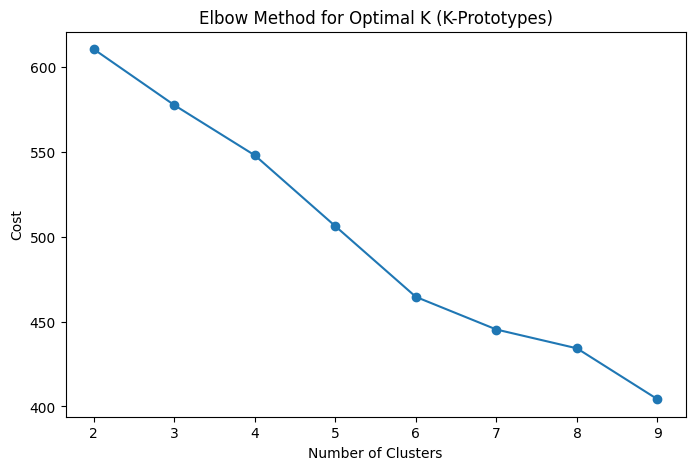

In [90]:
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, cost, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal K (K-Prototypes)')
plt.show()

Step 3: Perform K-Prototypes clustering with the optimal number of clusters

In [128]:
optimal_k = 6
kproto = KPrototypes(n_clusters=optimal_k, random_state=42, init='Cao')
clusters = kproto.fit_predict(X_combined, categorical=categorical)

Add the cluster labels to the original data

In [129]:
for_clustering['kproto_cluster'] = clusters

ount no. of texts in each cluster

In [130]:
groups = sorted(list(set(for_clustering['group'].tolist())))

In [131]:
counts = []
for group in groups:
    df_group = for_clustering[for_clustering['group'] == group].copy()
    x = 0
    while x < 6:
        df_cluster = df_group[df_group['kproto_cluster'] == x]
        count = len(df_cluster)
        counts.append((group, 'cluster'+str(x+1), count))
        x+=1

In [132]:
df_counts = pd.DataFrame(counts, columns=['group', 'cluster', 'count'])

In [133]:
fig = px.sunburst(df_counts, path=['cluster', 'group'], values='count')

In [134]:
import kaleido

In [135]:
fig.update_layout(
    font=dict(
        size=100
        )
)
#fig.write_html(r"F:\Kritik_projekt\results\clustering_new.html")
fig.write_image(r"Fig12.jpg", width=7.5*600, height=7.5*600)

Step 4: Visualize clusters (optional, since categorical data is involved)<br>
Reduce dimensionality for visualization

In [136]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_combined)

In [137]:
palette = sns.color_palette(cc.glasbey, n_colors=13)

<ipython-input-138-c325cbb31ec1>:2: UserWarning:

The palette list has more values (13) than needed (11), which may not be intended.



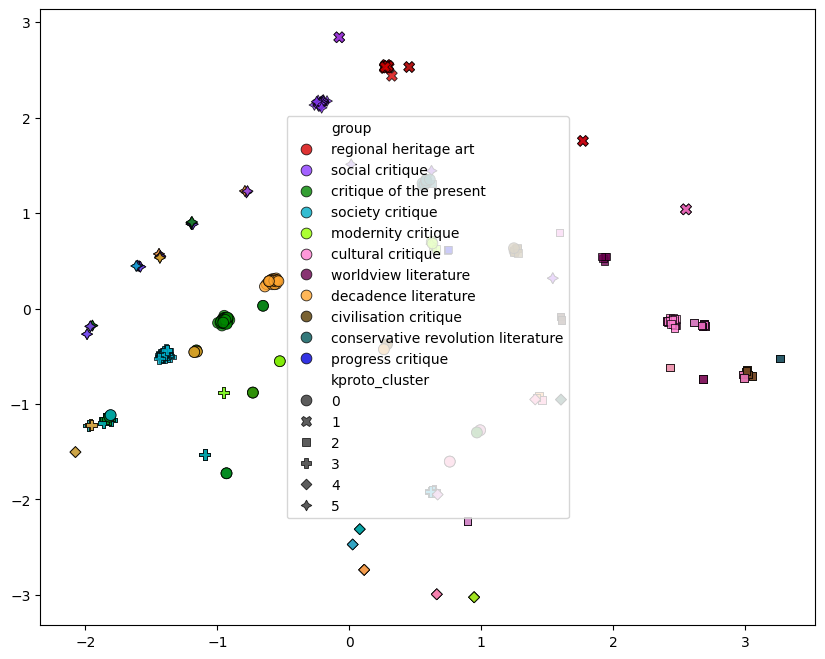

In [138]:
plt.figure(figsize=(10, 8))
g=sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=for_clustering['group'],
    palette=palette,
    style=for_clustering['kproto_cluster'],
    s=60, alpha=0.8, edgecolor='k'
)